<a href="https://colab.research.google.com/github/srijan-27/Lets-Grow-More/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **LGM VIP Task-1: Iris Flower Classification**

**Executed by: Srijan Rastogi | srastogi751@gmail.com**

### **Importing the necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix as sm
from sklearn.model_selection import train_test_split as ts
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


from warnings import filterwarnings
filterwarnings(action='ignore')

### **Loading Data Set**

In [2]:
iris="https://raw.githubusercontent.com/kriti818/LetsGrowMore/main/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(iris, names=names)
dataset

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### **Data Summarization**

Shape

In [3]:
print(dataset.shape)

(150, 5)


Head

In [4]:
print(dataset.head(20))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

Tail

In [5]:
print(dataset.tail(20))

     sepal-length  sepal-width  petal-length  petal-width           class
130           7.4          2.8           6.1          1.9  Iris-virginica
131           7.9          3.8           6.4          2.0  Iris-virginica
132           6.4          2.8           5.6          2.2  Iris-virginica
133           6.3          2.8           5.1          1.5  Iris-virginica
134           6.1          2.6           5.6          1.4  Iris-virginica
135           7.7          3.0           6.1          2.3  Iris-virginica
136           6.3          3.4           5.6          2.4  Iris-virginica
137           6.4          3.1           5.5          1.8  Iris-virginica
138           6.0          3.0           4.8          1.8  Iris-virginica
139           6.9          3.1           5.4          2.1  Iris-virginica
140           6.7          3.1           5.6          2.4  Iris-virginica
141           6.9          3.1           5.1          2.3  Iris-virginica
142           5.8          2.7        

Describe

In [6]:
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


Checking for null values

In [7]:
print(dataset.isna().sum())

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
class           0
dtype: int64


Class Distribution

In [8]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


### **Data Visualization**

Pie Chart

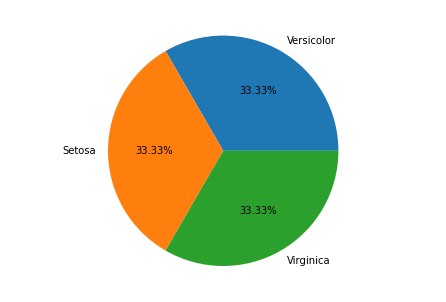

In [9]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

Histogram

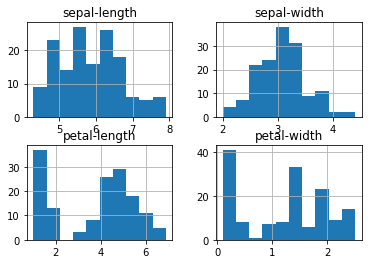

In [10]:
dataset.hist()
plt.show()

Box and Whisker Plot

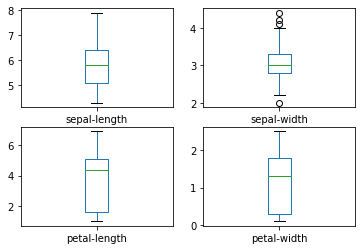

In [11]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f226613dd90>,
      dtype=object)

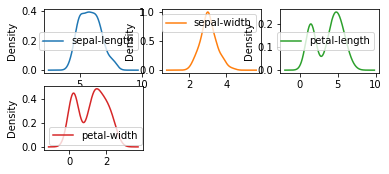

In [12]:
dataset.plot(kind ='density',subplots = True, layout =(3,3),sharex = False)

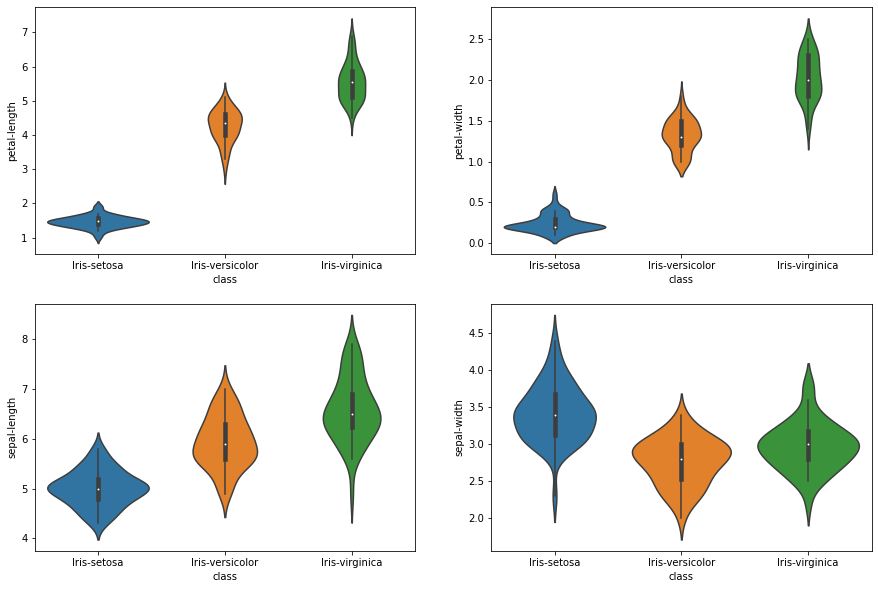

In [13]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='class',y='petal-length',data=dataset)
plt.subplot(2,2,2)
sns.violinplot(x='class',y='petal-width',data=dataset)
plt.subplot(2,2,3)
sns.violinplot(x='class',y='sepal-length',data=dataset)
plt.subplot(2,2,4)
sns.violinplot(x='class',y='sepal-width',data=dataset)


Pair Plot

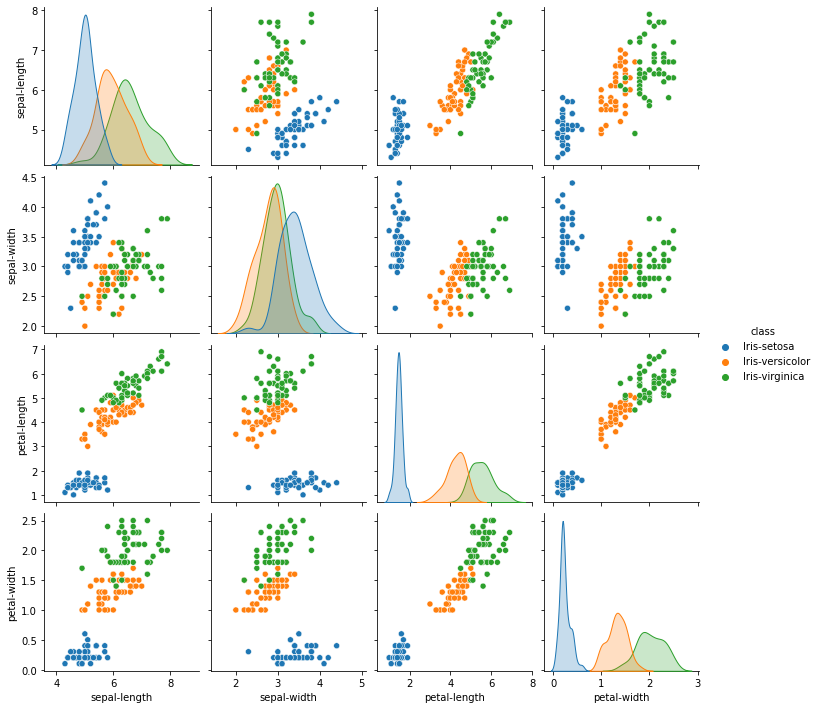

In [14]:
sns.pairplot(dataset,hue='class');

Scatter Plot Matrix

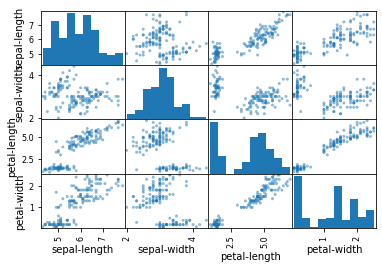

In [15]:
sm(dataset)
plt.show()

Heat Map

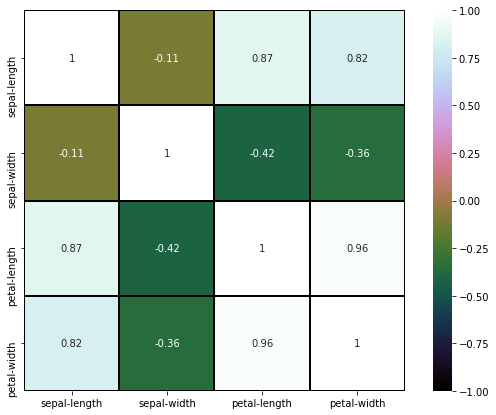

In [16]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.heatmap(dataset.corr(),annot=True,cmap='cubehelix',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)


### Validating dataset

In [17]:
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = ts(X, y, test_size=0.20, random_state=1)

Spot Check Algorithms

In [18]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

Evaluate each model in turn

In [19]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.941667 (0.038188)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


Compare Algorithms

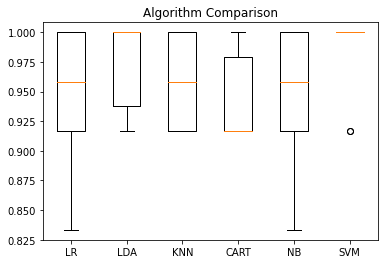

In [20]:
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

### **Make predictions on validation dataset**

In [21]:
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

Evaluate predictions

In [22]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

